In [1]:
import pandas as pd
import json

def load_data(file_path):
    if file_path.endswith('.csv'):
        return pd.read_csv(file_path)
    elif file_path.endswith('.json'):
        with open(file_path, 'r') as f:
            data = json.load(f)
        return pd.DataFrame(data)
    elif file_path.endswith('.xlsx'):
        return pd.read_excel(file_path)
    else:
        raise ValueError("Unsupported file format")

def clean_data(df):
    df = df.drop_duplicates()
    df = df.fillna(df.median(numeric_only=True))
    return df


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def run_linear_regression(X, y):
    model = LinearRegression()
    model.fit(X, y)
    return model

def run_kmeans_clustering(X, n_clusters=3):
    model = KMeans(n_clusters=n_clusters)
    model.fit(X)
    return model

def run_decision_tree_classification(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return model, accuracy


In [3]:
from jinja2 import Template
import pandas as pd

def generate_data_summary(df):
    summary = {
        'num_rows': df.shape[0],
        'num_columns': df.shape[1],
        'columns': df.columns.tolist(),
        'missing_values': df.isnull().sum().sum(),
        'basic_stats': df.describe().to_dict()
    }

    stats_summary = "\n".join([f"{key}: {value}" for key, value in summary['basic_stats'].items()])

    summary_text = f"""
    Dataset Summary:
    ----------------
    - Number of rows: {summary['num_rows']}
    - Number of columns: {summary['num_columns']}
    - Columns: {', '.join(summary['columns'])}
    - Total missing values: {summary['missing_values']}

    Basic Statistics:
    -----------------
    {stats_summary}
    """

    return summary_text

def generate_report(summary, df, visualizations=['pairplot.png']):
    data_summary = generate_data_summary(df)

    template = Template("""
    <html>
        <head><title>Analysis Report</title></head>
        <body>
            <h1>Data Analysis Report</h1>
            <h2>Dataset Summary</h2>
            <pre>{{ data_summary }}</pre>
            <h2>Analysis Summary</h2>
            <p>{{ summary }}</p>
            <h2>Visualizations</h2>
            {% for viz in visualizations %}
            <img src="{{ viz }}" alt="Visualization" style="width:100%;max-width:600px;">
            {% endfor %}
        </body>
    </html>
    """)

    report = template.render(data_summary=data_summary, summary=summary, visualizations=visualizations)
    with open('report.html', 'w') as f:
        f.write(report)

    print("Report generated and saved as 'report.html'")


Available columns in the dataset: ['Rank', 'Country', 'Country Code', 'Gold', 'Silver', 'Bronze', 'Total']
K-Means Cluster Centers: [[46.21052632 21.57894737 21.23684211  1.73684211  1.68421053  2.55263158
   5.97368421]
 [53.76744186 66.3255814  67.11627907  1.44186047  1.65116279  2.23255814
   5.3255814 ]
 [ 5.5        42.3        40.2        20.         19.2        19.1
  58.3       ]]


c:\Users\shiva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Visualization saved as 'pairplot.png'
Report generated and saved as 'report.html'


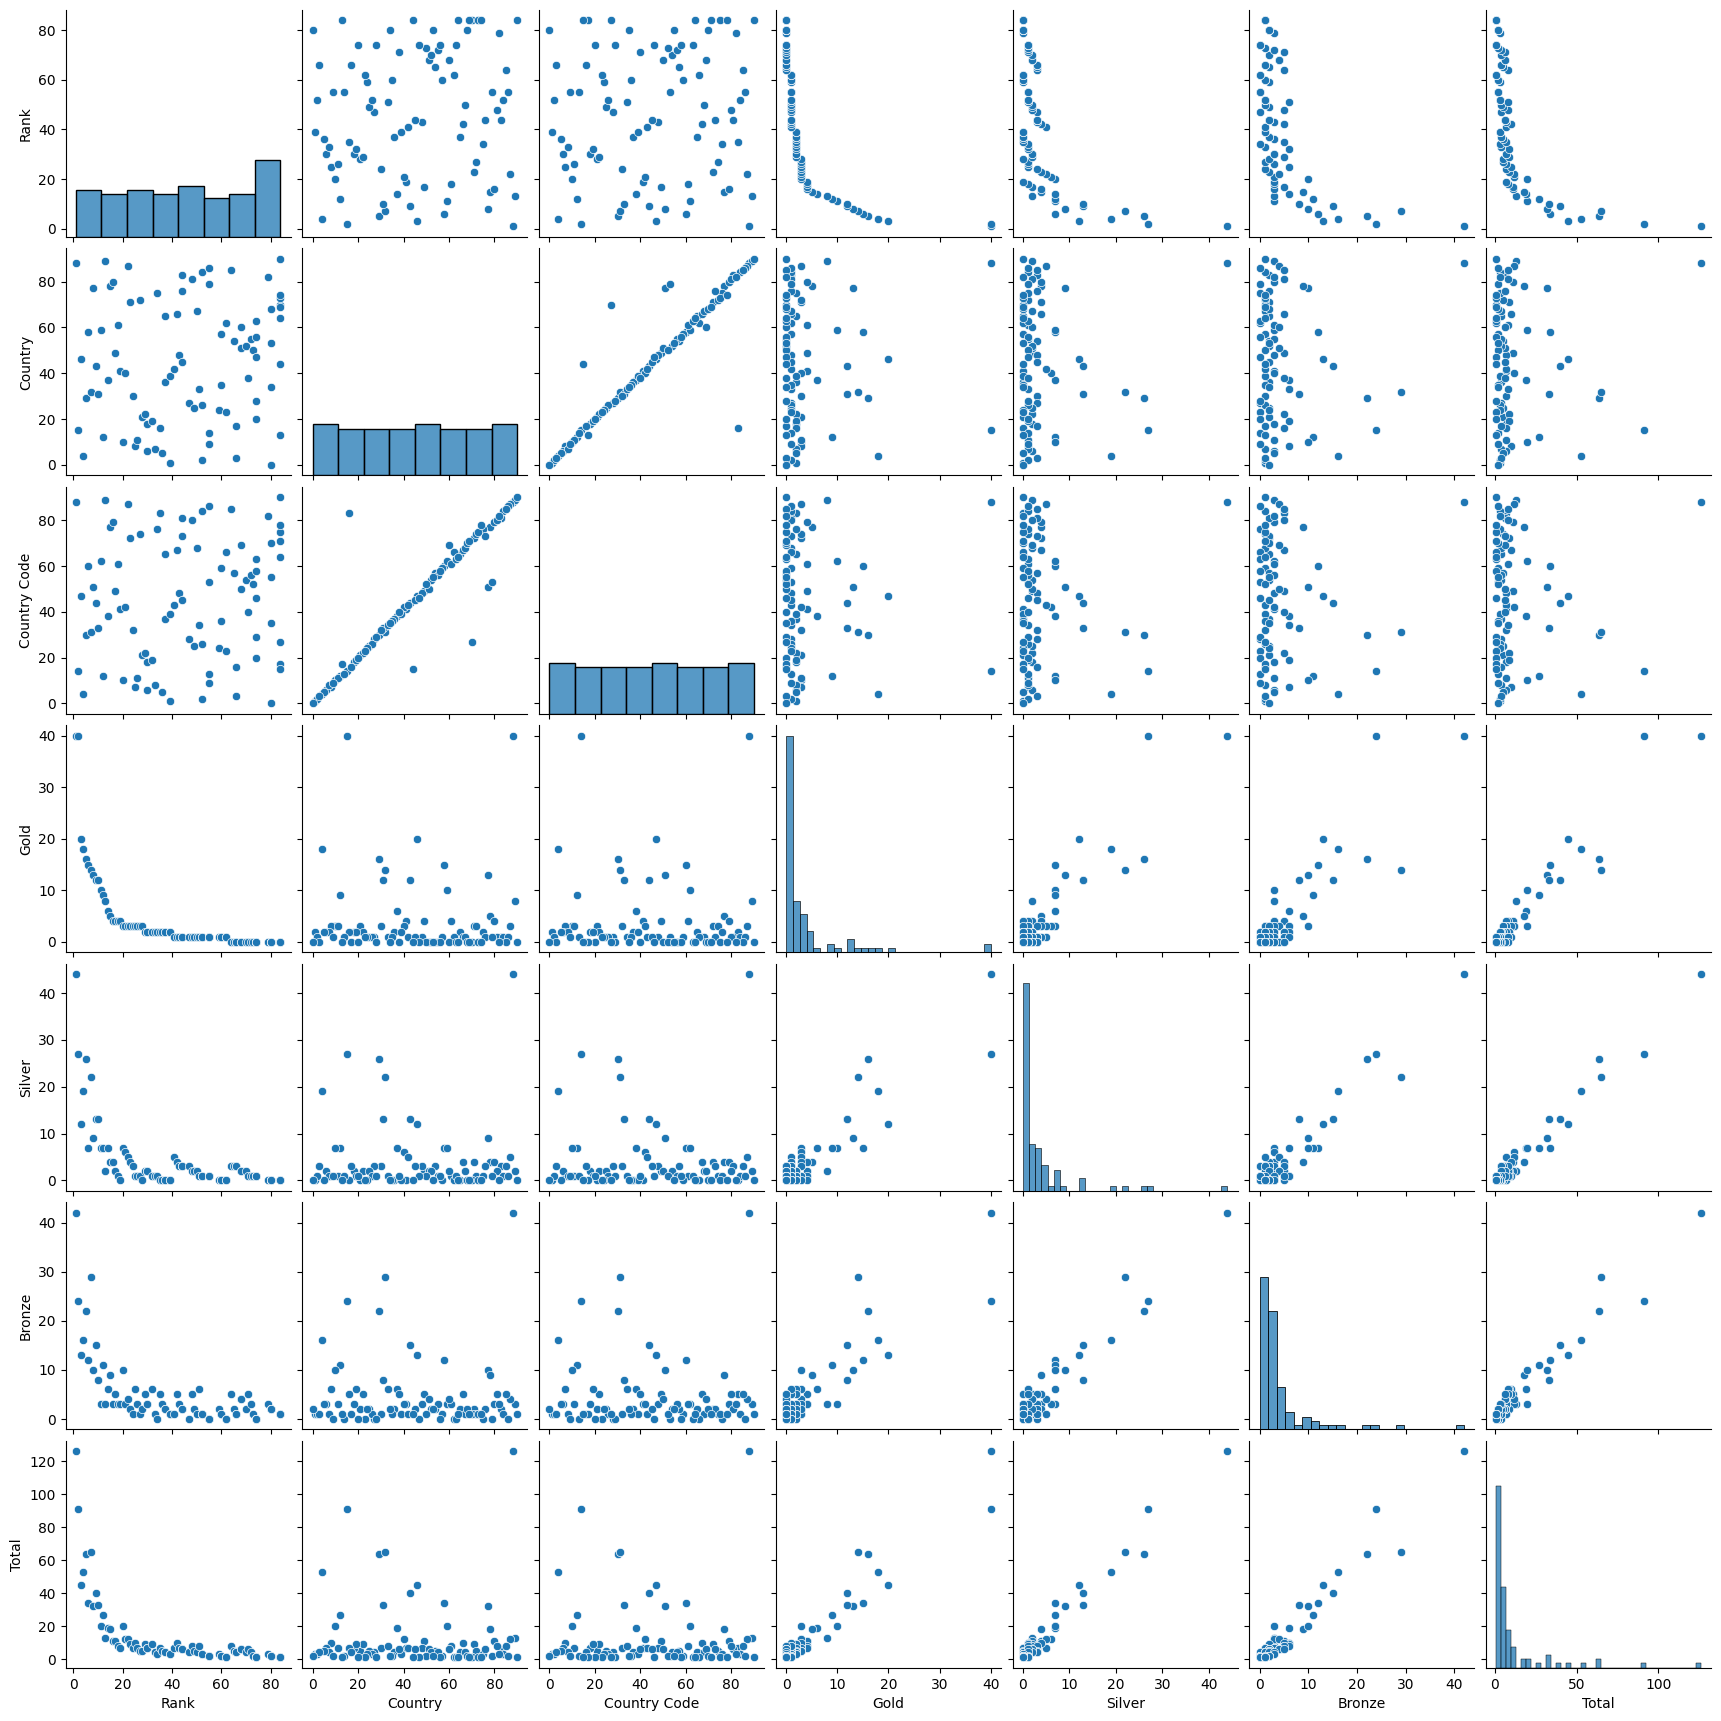

In [5]:
from sklearn.preprocessing import LabelEncoder
import argparse
import sys
import matplotlib.pyplot as plt
import seaborn as sns

def generate_visualizations(df):
    sns.pairplot(df)
    plt.savefig('pairplot.png') 
    print("Visualization saved as 'pairplot.png'")



def main():
    if 'ipykernel' in sys.modules:
        args = argparse.Namespace(
            file='olympics2024.csv',
            analyze='clustering',
            target='Gold'
        )
    else:
        parser = argparse.ArgumentParser(description="AI Employee - Data Analysis")
        parser.add_argument('--file', type=str, help="Path to the data file")
        parser.add_argument('--analyze', type=str, choices=['regression', 'clustering', 'classification'],
                            help="Type of analysis to run")
        parser.add_argument('--target', type=str, help="Target column for analysis")
        args = parser.parse_args()
    df = load_data(args.file)
    df = clean_data(df)

    print("Available columns in the dataset:", df.columns.tolist())

    if args.target not in df.columns:
        raise KeyError(f"Target column '{args.target}' not found in the dataset.")

    categorical_columns = df.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        if col != args.target: 
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])

    if args.analyze == 'regression':
        X = df.drop(columns=[args.target])
        y = df[args.target]
        model = run_linear_regression(X, y)
        print("Linear Regression model coefficients:", model.coef_)

    elif args.analyze == 'clustering':
        X = df
        model = run_kmeans_clustering(X)
        print("K-Means Cluster Centers:", model.cluster_centers_)

    elif args.analyze == 'classification':
        X = df.drop(columns=[args.target])
        y = df[args.target]
        model, accuracy = run_decision_tree_classification(X, y)
        print(f"Decision Tree Classification Accuracy: {accuracy}")

    summary = "Analysis summary goes here."
    generate_visualizations(df)
    generate_report(summary,df)

if __name__ == '__main__':
    main()


In [6]:
import unittest

class TestAIModule(unittest.TestCase):

    def test_load_data_csv(self):
        df = load_data('olympics2024.csv')  
        self.assertIsInstance(df, pd.DataFrame)

    def test_clean_data(self):
        df = pd.DataFrame({'A': [1, 2, None], 'B': [None, 2, 3]})
        clean_df = clean_data(df)
        self.assertFalse(clean_df.isnull().values.any())

def run_tests():
    suite = unittest.TestLoader().loadTestsFromTestCase(TestAIModule)
    unittest.TextTestRunner().run(suite)

run_tests()


..
----------------------------------------------------------------------
Ran 2 tests in 0.014s

OK
